## Lab5 testbench
Run this cell before running any other cells

In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

In [2]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2025-03-07 10:41:23,709 | INFO     |: info
2025-03-07 10:41:23,710 | WARNING  |: warning
2025-03-07 10:41:23,710 | ERROR    |: error
2025-03-07 10:41:23,711 | CRITICAL |: critical


In [844]:
ble = get_ble_controller()
ble.connect()

2025-03-07 15:16:58,913 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:c3:e4:25:23:51
2025-03-07 15:17:04,230 | INFO     |: Connected to c0:c3:e4:25:23:51


In [845]:
import re

sensor_data_index = 0
sensor_data = [[0.0 for _ in range(6)] for _ in range(2500)]

msg = None

def data_collect(uuid, byte_array):
    global sensor_data_index
    msg = ble.bytearray_to_string(byte_array)
    data = re.findall(r'-?\d+\.\d+', msg)
    sensor_data[sensor_data_index] = [float(num) for num in data]
    sensor_data_index += 1

ble.start_notify(ble.uuid['RX_STRING'], data_collect)


In [846]:
ble.send_command(CMD.PID_POSITION_CONTROL, "6|0.01|0.13|200|300")  # time, Kp, Ki, Kd, target_tof

In [850]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(sensor_data)
time = data[:sensor_data_index, 0]
tof = data[:sensor_data_index, 1]
speed = data[:sensor_data_index, 2]
kp = data[:sensor_data_index, 3]
ki = data[:sensor_data_index, 4]
kd = data[:sensor_data_index, 5]

In [823]:
ble.send_command(CMD.STOP, "") 

In [848]:
print(sensor_data_index)

512


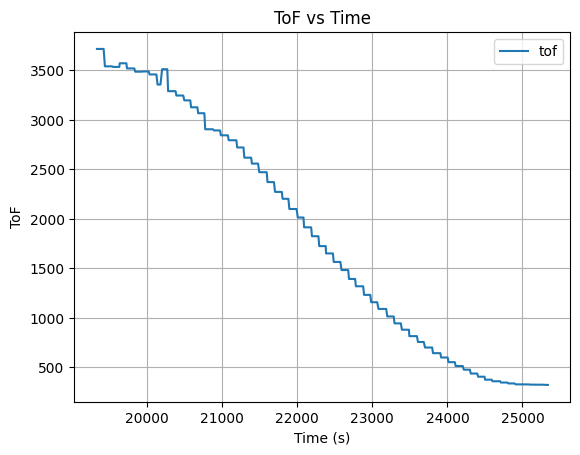

In [851]:
plt.figure()
plt.plot(time, tof, label='tof')
plt.title('ToF vs Time')
plt.xlabel('Time (s)')
plt.ylabel('ToF')
plt.legend()
plt.grid()
plt.show()

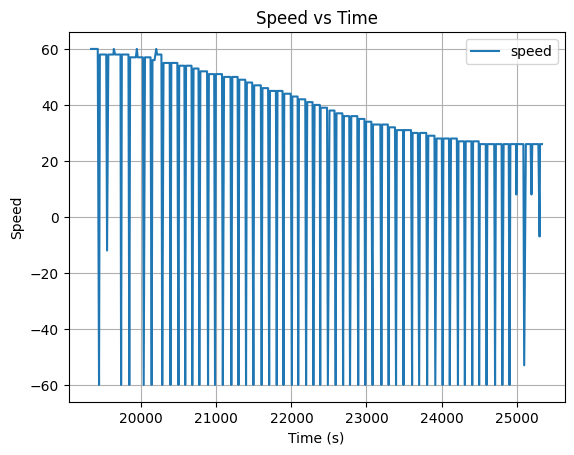

In [852]:
plt.figure()
plt.plot(time, speed, label='speed')
plt.title('Speed vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Speed')
plt.legend()
plt.grid()
plt.show()


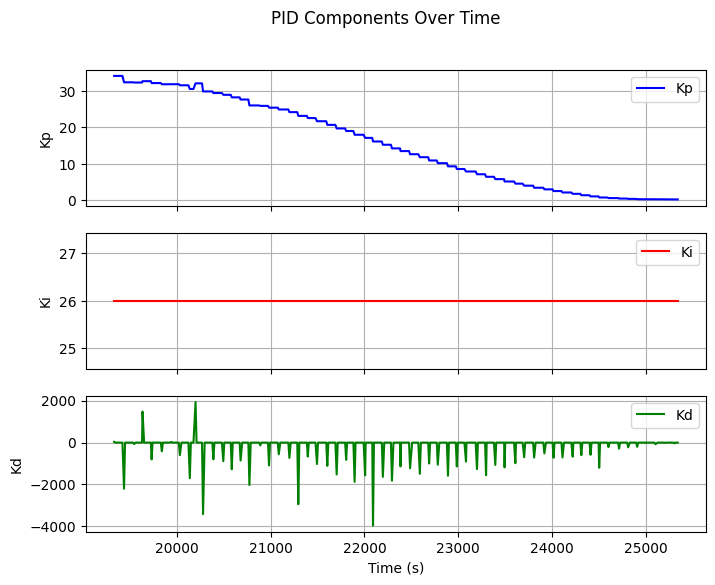

In [853]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)  # Create 3 subplots

axes[0].plot(time, kp, color='b', label='Kp')
axes[0].set_ylabel('Kp')
axes[0].legend()
axes[0].grid()

axes[1].plot(time, ki, color='r', label='Ki')
axes[1].set_ylabel('Ki')
axes[1].legend()
axes[1].grid()

axes[2].plot(time[:], kd[:], color='g', label='Kd')
axes[2].set_ylabel('Kd')
axes[2].set_xlabel('Time (s)')
axes[2].legend()
axes[2].grid()

plt.suptitle('PID Components Over Time')
plt.show()
